# Lab 1. PyTorch and ANNs

This lab is a warm up to get you used to the PyTorch programming environment used
in the course, and also to help you review and renew your knowledge
of Python and relevant Python libraries.
The lab must be done individually. Please recall that the
University of Toronto plagarism rules apply.

By the end of this lab, you should be able to:

1. Be able to perform basic PyTorch tensor operations.
2. Be able to load data into PyTorch
3. Be able to configure an Artificial Neural Network (ANN) using PyTorch
4. Be able to train ANNs using PyTorch
5. Be able to evaluate different ANN configuations

You will need to use numpy and PyTorch documentations for this assignment:

* https://docs.scipy.org/doc/numpy/reference/
* https://pytorch.org/docs/stable/torch.html

You can also reference Python API documentations freely.


### What to submit

Submit a PDF file containing all your code, outputs, and write-up
from parts 1-5. You can produce a PDF of your Google Colab file by
going to `File -> Print` and then save as PDF. The Colab instructions
has more information.

**Do not submit any other files produced by your code.**

Include a link to your colab file in your submission.

Please use Google Colab to complete this assignment. If you want to use Jupyter Notebook, please complete the assignment and upload your Jupyter Notebook file to Google Colab for submission. 

**Adjust the scaling to ensure that the text is not cutoff at the margins.**

## Colab Link

Submit make sure to include a link to your colab file here

Colab Link: https://colab.research.google.com/drive/1xoFcVnefVPS_YZmcoO9ufIKB8MuChxNQ

## Part 1. Python Basics [3 pt]

The purpose of this section is to get you used to the 
basics of Python, including working with functions, numbers,
lists, and strings.

Note that we **will** be checking your code for clarity and efficiency.

If you have trouble with this part of the assignment, please review http://cs231n.github.io/python-numpy-tutorial/

### Part (a) -- 1pt

Write a function `sum_of_cubes` that computes the sum of cubes up to `n`. If the input to `sum_of_cubes` invalid (e.g. negative or non-integer `n`), the function should print out `"Invalid input"` and return `-1`.

In [90]:
def sum_of_cubes(n):
    """Return the sum (1^3 + 2^3 + 3^3 + ... + n^3)
    
    Precondition: n > 0, type(n) == int
    
    >>> sum_of_cubes(3)
    36
    >>> sum_of_cubes(1)
    1
    """
    if not isinstance(n, int) or n <=0 :
      print("Invalid input")
      return -1
    result = 0
    for i in range(n):
      result += i**3
    return result


### Part (b) -- 1pt

Write a function `word_lengths` that takes a sentence (string), computes the length of each word in that sentence, and returns the length of each word in a list. You can
assume that words are always separated by a space character `" "`.

Hint: recall the `str.split` function in Python.
If you arenot sure how this function works, try
typing `help(str.split)` into a Python shell, or check out https://docs.python.org/3.6/library/stdtypes.html#str.split

In [91]:
help(str.split)

Help on method_descriptor:

split(self, /, sep=None, maxsplit=-1)
    Return a list of the substrings in the string, using sep as the separator string.
    
      sep
        The separator used to split the string.
    
        When set to None (the default value), will split on any whitespace
        character (including \\n \\r \\t \\f and spaces) and will discard
        empty strings from the result.
      maxsplit
        Maximum number of splits (starting from the left).
        -1 (the default value) means no limit.
    
    Note, str.split() is mainly useful for data that has been intentionally
    delimited.  With natural text that includes punctuation, consider using
    the regular expression module.



In [92]:
def word_lengths(sentence):
    """Return a list containing the length of each word in
    sentence.
    
    >>> word_lengths("welcome to APS360!")
    [7, 2, 7]
    >>> word_lengths("machine learning is so cool")
    [7, 8, 2, 2, 4]
    """
    return [len(word) for word in sentence.split()]

### Part (c) -- 1pt

Write a function `all_same_length` that takes a sentence (string),
and checks whether every word in the string is the same length.
You should call the function `word_lengths` in the body
of this new function.


In [93]:
def all_same_length(sentence):
    """Return True if every word in sentence has the same
    length, and False otherwise.
    
    >>> all_same_length("all same length")
    False
    >>> word_lengths("hello world")
    True
    """
    lengths = word_lengths(sentence)
    return all(length == lengths[0] for length in lengths)

## Part 2. NumPy Exercises [5 pt]

In this part of the assignment, you'll be manipulating arrays 
usign NumPy. Normally, we use the shorter name `np` to represent
the package `numpy`.

In [94]:
import numpy as np

### Part (a) -- 1pt

The below variables `matrix` and `vector` are numpy arrays. Explain what you think `<NumpyArray>.size` and `<NumpyArray>.shape` represent.

In [95]:
matrix = np.array([[1., 2., 3., 0.5],
                   [4., 5., 0., 0.],
                   [-1., -2., 1., 1.]])
vector = np.array([2., 0., 1., -2.])

In [96]:
# size is the number of elements in the given matrix
matrix.size

12

In [97]:
# shape is the dimensions of the matrix. In this case it is a 3 by 4 matrix
matrix.shape

(3, 4)

In [98]:
# size is the number of elements in the given vector
vector.size

4

In [99]:
# shape is the dimensions of the matrix, in this case it is a 1-D array with 4 elements
vector.shape

(4,)

### Part (b) -- 1pt

Perform matrix multiplication `output = matrix x vector` by using
for loops to iterate through the columns and rows.
Do not use any builtin NumPy functions.
Cast your output into a NumPy array, if it isn't one already.

Hint: be mindful of the dimension of output

In [100]:
output = np.zeros((matrix.shape[0]))
for row_idx in range(matrix.shape[0]):
  for col_idx in range(matrix.shape[1]):
    output[row_idx] += matrix[row_idx, col_idx] * vector[col_idx]

In [101]:
output

array([ 4.,  8., -3.])

### Part (c) -- 1pt

Perform matrix multiplication `output2 = matrix x vector` by using
the function `numpy.dot`.

We will never actually write code as in
part(c), not only because `numpy.dot` is more concise and easier to read/write, but also performance-wise `numpy.dot` is much faster (it is written in C and highly optimized).
In general, we will avoid for loops in our code.

In [102]:
output2 = np.dot(matrix, vector)

In [103]:
output2

array([ 4.,  8., -3.])

### Part (d) -- 1pt

As a way to test for consistency, show that the two outputs match.

In [104]:
# returns true if every element of output is equal to that of output2 at the same location
all(output == output2)

True

### Part (e) -- 1pt

Show that using `np.dot` is faster than using your code from part (c).

You may find the below code snippit helpful:

In [105]:
import time

# my own implementation of matrix multiplcation
# record the time before running code
start_time = time.time()

# place code to run here
for i in range(10000):
    for row_idx in range(matrix.shape[0]):
      for col_idx in range(matrix.shape[1]):
        output[row_idx] += matrix[row_idx, col_idx] * vector[col_idx]
    
# record the time after the code is run
end_time = time.time()

# compute the difference
diff = end_time - start_time
custom_time = diff
custom_time

0.04399895668029785

In [106]:
# my own implementation of matrix multiplcation
# record the time before running code
start_time = time.time()

# place code to run here
for i in range(10000):
    output2 = np.dot(matrix, vector)
    
# record the time after the code is run
end_time = time.time()

# compute the difference
diff = end_time - start_time
np_time = diff
np_time

0.008499622344970703

In [107]:
percentage_diff = (custom_time - np_time) / ((custom_time + np_time) / 2) * 100
print("np_time is faster by {:.2f}%".format(percentage_diff))

np_time is faster by 135.24%


## Part 3. Images [6 pt]

A picture or image can be represented as a NumPy array of “pixels”, 
with dimensions H × W × C, where H is the height of the image, W is the width of the image,
and C is the number of colour channels. Typically we will use an image with channels that give the the Red, Green, and Blue “level” of each pixel, which is referred to with the short form RGB.

You will write Python code to load an image, and perform several array manipulations to the image and visualize their effects. 

In [108]:
import matplotlib.pyplot as plt

### Part (a) -- 1 pt

This is a photograph of a dog whose name is Mochi.

![alt text](https://drive.google.com/uc?export=view&id=1oaLVR2hr1_qzpKQ47i9rVUIklwbDcews)

Load the image from its url (https://drive.google.com/uc?export=view&id=1oaLVR2hr1_qzpKQ47i9rVUIklwbDcews) into the variable `img` using the `plt.imread` function.

Hint: You can enter the URL directly into the `plt.imread` function as a Python string.

In [109]:
import urllib
import PIL

# for some reason plt.imread() doesn't work for me, so I used this instead. End result is the same
url = "https://drive.google.com/uc?export=view&id=1oaLVR2hr1_qzpKQ47i9rVUIklwbDcews"
fd = urllib.request.urlopen(url)
img = PIL.Image.open(fd)
img.load()
img = np.asarray(img) / 255

### Part (b) -- 1pt

Use the function `plt.imshow` to visualize `img`. 

This function will also show the coordinate system used to identify pixels.
The origin is at the top left corner, and the first dimension indicates the Y (row) direction, 
and the second dimension indicates the X (column) dimension.

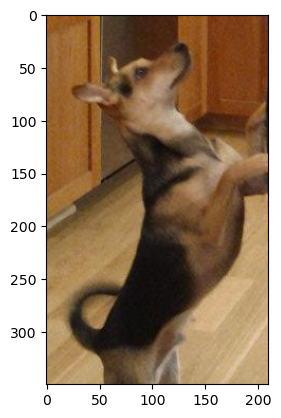

In [110]:
plt.imshow(img)

### Part (c) -- 2pt

Modify the image by adding a constant value of 0.25 to each pixel in the `img` and
store the result in the variable `img_add`. Note that, since the range for the pixels 
needs to be between [0, 1], you will also need to clip img_add to be in the range [0, 1] 
using `numpy.clip`. Clipping sets any value that is outside of the desired range to the 
closest endpoint. Display the image using `plt.imshow`.

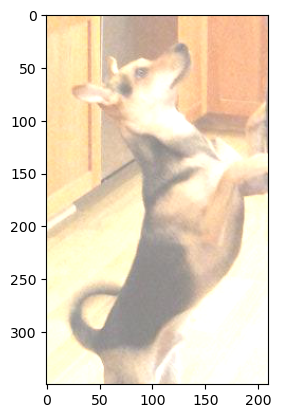

In [111]:
img_add = np.clip(img + 0.5, 0, 1)
plt.imshow(img_add)

### Part (d) -- 2pt

Crop the **original** image (`img` variable) to a 130 x 150 image including Mochi's face. Discard the alpha colour channel (i.e. resulting `img_cropped` should **only have RGB channels**)

Display the image.

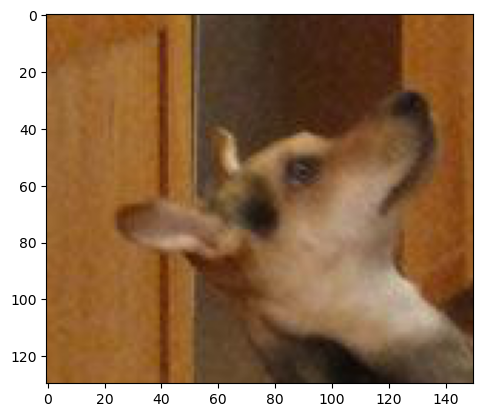

In [112]:
img_cropped = img[0:130, 0:150, 0:3]
plt.imshow(img_cropped)

## Part 4. Basics of PyTorch [6 pt]

PyTorch is a Python-based neural networks package. Along with tensorflow, PyTorch is currently one of the most popular machine learning libraries.

PyTorch, at its core, is similar to Numpy in a sense that they both 
try to make it easier to write codes for scientific computing
achieve improved performance over vanilla Python by leveraging highly optimized C back-end.
However, compare to Numpy, PyTorch offers much better GPU support and provides many high-level features for machine learning. Technically, Numpy can be used to perform almost every thing PyTorch does. However, Numpy would be a lot slower than PyTorch, especially with CUDA GPU, and it would take more effort to write machine learning related code compared to using PyTorch.

In [113]:
import torch

### Part (a) -- 1 pt

Use the function `torch.from_numpy` to convert the numpy array `img_cropped` into
a PyTorch tensor. Save the result in a variable called `img_torch`.

In [114]:
img_torch = torch.from_numpy(img_cropped)

### Part (b) -- 1pt

Use the method `<Tensor>.shape` to find the shape (dimension and size) of `img_torch`.

In [115]:
img_torch.shape

torch.Size([130, 150, 3])

### Part (c) -- 1pt

How many floating-point numbers are stored in the tensor `img_torch`?

In [116]:
img_torch.numel()

58500

### Part (d) -- 1 pt

What does the code `img_torch.transpose(0,2)` do? What does the expression return? 
Is the original variable `img_torch` updated? Explain.

In [117]:
# the tensor gets transposed. It swaps the first and 3rd dimension. So instead of a shape of([130, 150, 3]), it becomes ([3, 150, 130])
# The original img_torch is not changed
img_torch.transpose(0, 2).shape

torch.Size([3, 150, 130])

### Part (e) -- 1 pt

What does the code `img_torch.unsqueeze(0)` do? What does the expression return? 
Is the original variable `img_torch` updated? Explain.

In [118]:
# img_torch.unsqueeze(0) adds a dimension to the tensor. The new dimension is added at the 0th index
# it returns a new tensor, the original img_torch is not changed
img_torch.unsqueeze(0).shape

torch.Size([1, 130, 150, 3])

### Part (f) -- 1 pt

Find the maximum value of `img_torch` along each colour channel? Your output should be a one-dimensional
PyTorch tensor with exactly three values.

Hint: lookup the function `torch.max`.

In [119]:
max_vals, _ = torch.max(torch.max(img_torch, dim=1)[0], dim=0)
max_vals

tensor([0.8941, 0.7882, 0.6745], dtype=torch.float64)

## Part 5. Training an ANN [10 pt]

The sample code provided below is a 2-layer ANN trained on the MNIST dataset to identify digits less than 3 or greater than and equal to 3. Modify the code by changing any of the following and observe how the accuracy and error are affected:

- number of training iterations
- number of hidden units
- numbers of layers
- types of activation functions
- learning rate

Please select at least three different options from the list above. For each option, please select two to three different parameters and provide a table. 


In [120]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torchvision import datasets, transforms
import matplotlib.pyplot as plt # for plotting
import torch.optim as optim
import pandas as pd

torch.manual_seed(1) # set the random seed

# define a 2-layer artificial neural network
class Pigeon(nn.Module):
    def __init__(self, num_hidden=30, activation_function=torch.relu):
        super(Pigeon, self).__init__()
        self.activation_function = activation_function
        self.layer1 = nn.Linear(28 * 28, num_hidden)
        self.layer2 = nn.Linear(num_hidden, 1)
    def forward(self, img):
        flattened = img.view(-1, 28 * 28)
        activation1 = self.layer1(flattened)
        activation1 = self.activation_function(activation1)
        activation2 = self.layer2(activation1)
        return activation2
 
def model_accuracy(model, data):
    """Return the accuracy of the model on a given dataset."""
    error = 0
    for (image, label) in data:
        prob = torch.sigmoid(model(img_to_tensor(image)))
        if (prob < 0.5 and label < 3) or (prob >= 0.5 and label >= 3):
            error += 1
    return 1 - error / len(data)

def train(model, data, criterion, optimizer, epochs=1):
    """Train the model on a given dataset."""
    for epoch in range(epochs):
        for (image, label) in data:
            # actual ground truth: is the digit less than 3?
            actual = torch.tensor(label < 3).reshape([1,1]).type(torch.FloatTensor)
            # pigeon prediction
            out = model(img_to_tensor(image)) # step 1-2
            # update the parameters based on the loss
            loss = criterion(out, actual)      # step 3
            loss.backward()                    # step 4 (compute the updates for each parameter)
            optimizer.step()                   # step 4 (make the updates for each parameter)
            optimizer.zero_grad()              # a clean up step for PyTorch
# load the data
mnist_data = datasets.MNIST('data', train=True, download=True)
mnist_data = list(mnist_data)
mnist_train = mnist_data[:1000]
mnist_val   = mnist_data[1000:2000]
img_to_tensor = transforms.ToTensor()

# test 1: number of hidden units
param_to_accuracy = {"Hidden units": [20, 30, 60], "Training Accuracy": [], "Validation Accuracy": []}
for num_hidden in param_to_accuracy["Hidden units"]:
    pigeon = Pigeon(num_hidden)
    criterion = nn.BCEWithLogitsLoss() 
    optimizer = optim.SGD(pigeon.parameters(), lr=0.005, momentum=0.9)
    train(pigeon, mnist_train, criterion, optimizer)
    train_accuracy = model_accuracy(pigeon, mnist_train)
    vali_accuracy = model_accuracy(pigeon, mnist_val)
    param_to_accuracy["Training Accuracy"].append(train_accuracy)
    param_to_accuracy["Validation Accuracy"].append(vali_accuracy)
# display the results in a table
df = pd.DataFrame(param_to_accuracy).set_index("Hidden units")
print(df)

# test 2: epochs
param_to_accuracy = {"Epochs": [1, 2, 5], "Training Accuracy": [], "Validation Accuracy": []}
for epochs in param_to_accuracy["Epochs"]:
    pigeon = Pigeon()
    criterion = nn.BCEWithLogitsLoss() 
    optimizer = optim.SGD(pigeon.parameters(), lr=0.005, momentum=0.9)
    train(pigeon, mnist_train, criterion, optimizer, epochs)
    train_accuracy = model_accuracy(pigeon, mnist_train)
    vali_accuracy = model_accuracy(pigeon, mnist_val)
    param_to_accuracy["Training Accuracy"].append(train_accuracy)
    param_to_accuracy["Validation Accuracy"].append(vali_accuracy)
# display the results in a table
df = pd.DataFrame(param_to_accuracy).set_index("Epochs")
print(df)

# test 3: types of activation functions
param_to_accuracy = {"Activation Func": ["Relu", "Tanh", "sigmoid"],"Activation Function": [torch.relu, torch.tanh, torch.sigmoid], "Training Accuracy": [], "Validation Accuracy": []}
for activation_function in param_to_accuracy["Activation Function"]:
    pigeon = Pigeon(activation_function=activation_function)
    criterion = nn.BCEWithLogitsLoss() 
    optimizer = optim.SGD(pigeon.parameters(), lr=0.005, momentum=0.9)
    train(pigeon, mnist_train, criterion, optimizer)
    train_accuracy = model_accuracy(pigeon, mnist_train)
    vali_accuracy = model_accuracy(pigeon, mnist_val)
    param_to_accuracy["Training Accuracy"].append(train_accuracy)
    param_to_accuracy["Validation Accuracy"].append(vali_accuracy)
# display the results in a table
df = pd.DataFrame(param_to_accuracy).set_index("Activation Func").drop("Activation Function", axis=1)
print(df)

              Training Accuracy  Validation Accuracy
Hidden units                                        
20                        0.965                0.912
30                        0.958                0.907
60                        0.968                0.925
        Training Accuracy  Validation Accuracy
Epochs                                        
1                   0.966                0.918
2                   0.984                0.942
5                   0.990                0.925
                 Training Accuracy  Validation Accuracy
Activation Func                                        
Relu                         0.965                0.924
Tanh                         0.956                0.897
sigmoid                      0.925                0.881


### Part (a) -- 3 pt
Comment on which of the above changes resulted in the best accuracy on training data? What accuracy were you able to achieve?

In [121]:
"""The model with the best training accuracy is the model that has 5 epochs, 30 hidden units, and ReLU activation function. It was about to achieve 99% accuracy on the training data."""

'The model with the best training accuracy is the model that has 5 epochs, 30 hidden units, and ReLU activation function. It was about to achieve 99% accuracy on the training data.'

### Part (b) -- 3 pt


Comment on which of the above changes resulted in the best accuracy on testing data? What accuracy were you able to achieve?

In [122]:
"""The model with the best validation accuracy is the model with 2 epoches, 30 hidden units, and ReLU activation function. It was about to achieve 94.2% accuracy on the validation data."""

'The model with the best validation accuracy is the model with 2 epoches, 30 hidden units, and ReLU activation function. It was about to achieve 94.2% accuracy on the validation data.'

### Part (c) -- 4 pt
Which model hyperparameters should you use, the ones from (a) or (b)?

In [123]:
"""You should use the model hyperparameters from (b), because it has the best validation accuracy. 
This is because in (a) the high training accuracy is due to overfitting, which lead to a decrease in validation accuracy.
Therefore, it is advisable to choose the hyperparameters from (b) for better generalization and improved validation accuracy"""

'You should use the model hyperparameters from (b), because it has the best validation accuracy. \nThis is because in (a) the high training accuracy is due to overfitting, which lead to a decrease in validation accuracy.\nTherefore, it is advisable to choose the hyperparameters from (b) for better generalization and improved validation accuracy'